# Dataset : https://www.kaggle.com/datasets/ranand60/unstructured-text-language-data/data

# Downloading Data

In [5]:
import os
import shutil
import kaggle
import zipfile
COMPETITION_ID = 'unstructured-text-language-data' # Define the competition ID from kaggle
current_user_profile = os.path.expanduser("~")
kaggle_directory = os.path.join(current_user_profile, ".kaggle")
extract_dir = os.getcwd()
source_path = "kaggle.json"
destination_path = os.path.join(kaggle_directory, "kaggle.json")
shutil.copy(source_path, destination_path)

'/Users/ziyad/.kaggle/kaggle.json'

In [6]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset='ranand60/unstructured-text-language-data',path=extract_dir)

Dataset URL: https://www.kaggle.com/datasets/ranand60/unstructured-text-language-data


In [7]:
zip_file = '{}.zip'.format(COMPETITION_ID)

# Open and extract the ZIP file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    contents = zip_ref.namelist()
    zip_ref.extractall(extract_dir)
for i in contents:
    if i.endswith('.zip'):
        with zipfile.ZipFile(i, 'r') as zip_ref:
            contents = zip_ref.namelist()
            zip_ref.extractall(extract_dir)

print(f'The contents of {zip_file} have been extracted to {extract_dir}.')

The contents of unstructured-text-language-data.zip have been extracted to /Users/ziyad/Documents/Term_5/Deep learning/Final project.


# Data Understanding

In [47]:
import numpy as np
import pandas as pd

In [48]:
df = pd.read_excel("Unstructured Data English.xlsx")

In [49]:
df.head()

,ID,Katakana text Translated,Unnamed: 2
0,1,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo,NaN
1,2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport,NaN
2,3,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport,NaN
3,4,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/eEkfmtgln4,NaN
4,5,@EdgeofSports You take the good-You take the bad-Givin Bob Kraft hand jobs ain't so bad-The Facts of Life-The Facts of Life#tootiebowl,NaN


In [50]:
df.tail()

,ID,Katakana text Translated,Unnamed: 2
6931,6932,"CHEESE IN MY POCKETS VELVEETA""",NaN
6932,6933,"But why somebody just posted a pic on my fb feed of velveeta shells & cheese uncle Ben's brown rice or ricearoni & some frozen broccoli""",NaN
6933,6934,Cheese in my pockets .. Velveeta,NaN
6934,6935,Cheese in my pocket Velveeta !,NaN
6935,6936,Get a #Save $1 off #Kraft Natural #Cheese Products! #coupon http://pinterest.com/pin/446911962998255057/ …,NaN


In [51]:
df.sample(10)

,ID,Katakana text Translated,Unnamed: 2
6302,6303,Where do i find velveeta cheese in sg..,NaN
3924,3925,"Goodell on Kraft asking for an apology if cleared: ""This is my job. This is my responsibility to protect the integrity of the game.""",NaN
6660,6661,"Cheese in my pocket Velveeta! """,NaN
4640,4641,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/zaFP2DiWDW,NaN
4003,4004,@BadBoyBrooker --with him Dr. Kraft he says,NaN
4155,4156,#Patriots fan/media used to gloat saying #Kraft is asst. commissioner now suddenly its an @nfl witch hunt. Um u can't have both.,NaN
1996,1997,We love to have a little shine in our lives. SEI Metallic Kraft Paper for $7.50! http://t.co/gT6N393rDQ http://t.co/u7T6Pov9Fl,NaN
5818,5819,@Matt_Kraft_on love ya <ed><U+00A0><U+00BD><ed><U+00B2><U+0095>,NaN
2575,2576,RT @bkravitz: Asked goodell if he would apologize to kraft if nothing came of investigation. Noted it's his obligation to work on behalf of…,NaN
6356,6357,Cheese in my pockets velveeta,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        6936 non-null   int64 
 1   Katakana text Translated  6936 non-null   object
 2   Unnamed: 2                1 non-null      object
dtypes: int64(1), object(2)
memory usage: 162.7+ KB


# Data Preprocessing

# Removing Useless Columns

In [53]:
df['Unnamed: 2'].notnull().sum()

1

In [54]:
df[df['Unnamed: 2'].notnull() == True]

,ID,Katakana text Translated,Unnamed: 2
5988,5989,"""cheese in my pocket velveeta!""""","@ChiefKeef"""


In [55]:
df.drop(['Unnamed: 2','ID'],axis=1,inplace=True)

In [56]:
df

,Katakana text Translated
0,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo
1,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport
2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport
3,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/eEkfmtgln4
4,@EdgeofSports You take the good-You take the bad-Givin Bob Kraft hand jobs ain't so bad-The Facts of Life-The Facts of Life#tootiebowl
...,...
6931,"CHEESE IN MY POCKETS VELVEETA"""
6932,"But why somebody just posted a pic on my fb feed of velveeta shells & cheese uncle Ben's brown rice or ricearoni & some frozen broccoli"""
6933,Cheese in my pockets .. Velveeta
6934,Cheese in my pocket Velveeta !


# Removing Duplicates

In [57]:
df.head()

,Katakana text Translated
0,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo
1,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport
2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport
3,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/eEkfmtgln4
4,@EdgeofSports You take the good-You take the bad-Givin Bob Kraft hand jobs ain't so bad-The Facts of Life-The Facts of Life#tootiebowl


In [58]:
pd.set_option("display.max_colwidth",None)
df.head()

,Katakana text Translated
0,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo
1,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport
2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport
3,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/eEkfmtgln4
4,@EdgeofSports You take the good-You take the bad-Givin Bob Kraft hand jobs ain't so bad-The Facts of Life-The Facts of Life#tootiebowl


In [59]:
df.duplicated().sum()

166

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.duplicated().sum()

0

# Checking for Null values

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6770 entries, 0 to 6935
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Katakana text Translated  6770 non-null   object
dtypes: object(1)
memory usage: 105.8+ KB


In [63]:
df.isnull().sum()

Katakana text Translated    0
dtype: int64

# Statistical Analysis 

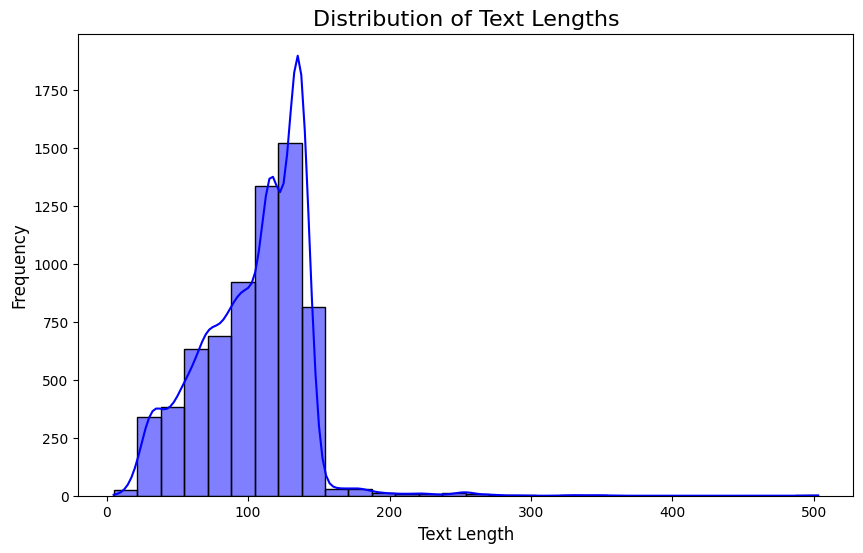

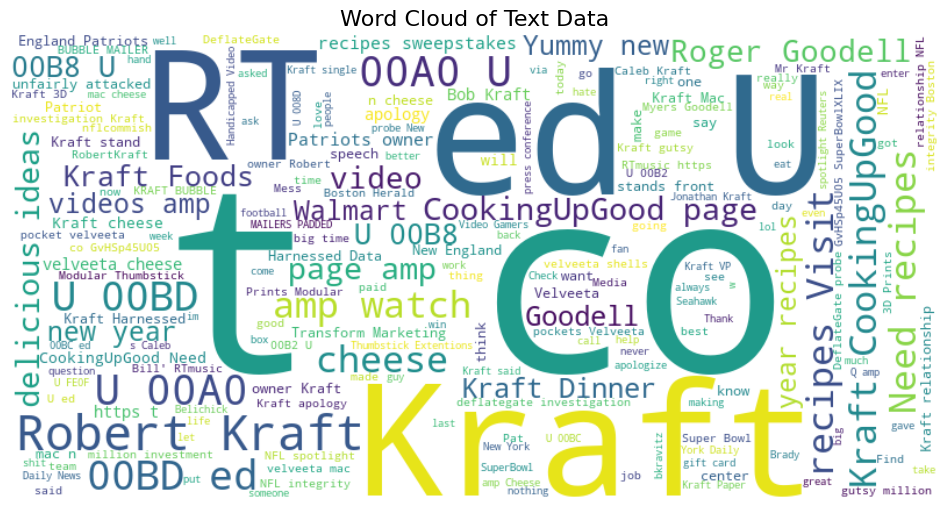

count    6770.000000
mean      103.851551
std        35.773181
min         5.000000
25%        79.000000
50%       112.000000
75%       132.000000
max       503.000000
Name: text_length, dtype: float64

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Calculate text length for each entry
df['text_length'] = df['Katakana text Translated'].apply(len)

# Summary statistics for text length
text_length_summary = df['text_length'].describe()

# Plotting the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Generate a word cloud for the text
text_data = " ".join(df['Katakana text Translated'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data', fontsize=16)
plt.show()

text_length_summary


# Text preprocessing

In [68]:
import re
import string
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [69]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/ziyad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ziyad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ziyad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/ziyad/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [70]:
# Ensure spaCy English model is downloaded
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("Downloading 'en_core_web_sm' model...")
    from spacy.cli import download
    download('en_core_web_sm')
    nlp = spacy.load('en_core_web_sm')

In [71]:
# Define a preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing Links
    text = re.sub(r'http\S+|www\.\S+', '', text)
    
    # Removing Punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Stopword Removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Lemmatization
    tokens = [token.lemma_ for token in nlp(" ".join(tokens))]
    
    # Removing Numbers
    tokens = [re.sub(r'\\d+', '', word) for word in tokens]
    
    # Removing Special Characters
    tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]
    
    # Handling Contractions
    contractions = {
        "can't": "cannot",
        "shouldn't": "should not",
        "don't": "do not",
    }
    tokens = [contractions.get(word, word) for word in tokens]
    
    # Joining tokens back into a string
    return " ".join(tokens)

# Apply preprocessing to the DataFrame column
df['Preprocessed Text'] = df['Katakana text Translated'].apply(preprocess_text)

df.head()

,Katakana text Translated,text_length,Preprocessed Text
0,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo,120,huge patriot pep ralli toso phxwait mr kraft arriv gopat patriotsextra
1,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport
2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport
3,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/eEkfmtgln4,116,need recip visit kraft cookingupgood page amp watch video delici idea
4,@EdgeofSports You take the good-You take the bad-Givin Bob Kraft hand jobs ain't so bad-The Facts of Life-The Facts of Life#tootiebowl,134,edgeofsport take goodyou take badgivin bob kraft hand job be not badth fact lifeth fact lifetootiebowl


In [72]:
df.sample(20)

,Katakana text Translated,text_length,Preprocessed Text
1248,RT @TotalBoyCandy: channing tatum can father my children <ed><U+00A0><U+00BD><ed><U+00B8><U+008D> https://t.co/Rs0gxagI6x,121,rt totalboycandi chan tatum father child eduaubdedubud
5747,@BillSimmons Kraft MUST have known. That's why he came out so confident in demanding an apology,95,billsimmon kraft must know that come confid demand apolog
3942,RT @Newsskijumping: LIVE: Final Round: Standings after 20 of 30 jumpers: 1. S.Kraft - 2. J.Damjan - 3. A.Jacobsen - 4. G.Schlierenzauer. #s…,140,rt newsskijump live final round stand jumper skraft jdamjan ajacobsen gschlierenzau s
704,This is too cute!! Rattlesnake Bite Hot Dog Appetizers Recipe - Kraft Recipes http://t.co/VvIvvRvUTB,100,cute rattlesnak bite hot dog appet recip kraft recip
100,#Patriots Wire: Kraft on speech: I didn't like being unfairly attacked http://t.co/LM1YdzEQdh http://t.co/HIrimaJiOs,116,patriot wire kraft speech do not like unfairli attack
4185,Patriots owner Kraft stands front-and-center in NFL spotlight http://t.co/SkYJPSoW0y #sport,91,patriot owner kraft stand frontandcent nfl spotlight sport
4807,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/Czx8xuxAfg,116,need recip visit kraft cookingupgood page amp watch video delici idea
2359,@THE_ELPRESADOR Goodell is such a puppet. Robert Kraft has him mind fucked. Lmao,80,theelpresador goodel puppet robert kraft mind fuck lmao
2199,@aurosan that's because it is Kraft dinner so...........I mean you can call it KD for short if that helps,105,aurosan that kraft dinner soi mean call kd short help
466,Kraft on speech: I didn't like being unfairly attacked http://t.co/SAWfxBFPNv,77,kraft speech do not like unfairli attack


In [73]:
df['Preprocessed Text'].duplicated().sum()

1523

# Information Extraction

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function to extract top keywords for a single row
def extract_keywords(text, max_features=5):
    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform([text])  # Process a single row
    return "; ".join(vectorizer.get_feature_names_out())

# Apply the function to each row in the DataFrame
df['Keywords'] = df['Preprocessed Text'].apply(lambda x: extract_keywords(x, max_features=5))

# Display the DataFrame with extracted keywords
df.head()

,Katakana text Translated,text_length,Preprocessed Text,Keywords
0,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo,120,huge patriot pep ralli toso phxwait mr kraft arriv gopat patriotsextra,arriv; gopat; huge; kraft; mr
1,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe
2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe
3,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/eEkfmtgln4,116,need recip visit kraft cookingupgood page amp watch video delici idea,amp; cookingupgood; delici; idea; kraft
4,@EdgeofSports You take the good-You take the bad-Givin Bob Kraft hand jobs ain't so bad-The Facts of Life-The Facts of Life#tootiebowl,134,edgeofsport take goodyou take badgivin bob kraft hand job be not badth fact lifeth fact lifetootiebowl,badgivin; badth; be; fact; take


In [75]:
# Define a function to extract URLs
def extract_urls(text):
    urls = re.findall(r'http\S+|www\.\S+', text)
    return urls if urls else 'None'

df['URLs'] = df['Katakana text Translated'].apply(extract_urls)

# Display the DataFrame with extracted URLs
df.head()

,Katakana text Translated,text_length,Preprocessed Text,Keywords,URLs
0,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo,120,huge patriot pep ralli toso phxwait mr kraft arriv gopat patriotsextra,arriv; gopat; huge; kraft; mr,[http://t.co/y9NElMN6jo]
1,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/Rw4oh3hswK]
2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/yN68nBRFne]
3,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/eEkfmtgln4,116,need recip visit kraft cookingupgood page amp watch video delici idea,amp; cookingupgood; delici; idea; kraft,[http://t.co/eEkfmtgln4]
4,@EdgeofSports You take the good-You take the bad-Givin Bob Kraft hand jobs ain't so bad-The Facts of Life-The Facts of Life#tootiebowl,134,edgeofsport take goodyou take badgivin bob kraft hand job be not badth fact lifeth fact lifetootiebowl,badgivin; badth; be; fact; take,None


In [76]:
# Counting Rows that don't Have URLs 
df['URLs'].value_counts()

URLs
None                                              3455
[https://t.co/GvHSp45U05]                          104
[http://t.c…]                                        8
[http://t.co…]                                       7
[http…]                                              7
                                                  ... 
[http://t.co/P4jfJLFntD]                             1
[http://t.co/hs7ZT1e6RG]                             1
[http://t.co/It7XCQzYwA]                             1
[http://t.co/snLFxVfM0z]                             1
[http://pinterest.com/pin/446911962998255057/]       1
Name: count, Length: 2915, dtype: int64

In [77]:
from textblob import TextBlob

# Analyze sentiment
df['Sentiment'] = df['Preprocessed Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the DataFrame with extracted sentiment
df.head()

,Katakana text Translated,text_length,Preprocessed Text,Keywords,URLs,Sentiment
0,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo,120,huge patriot pep ralli toso phxwait mr kraft arriv gopat patriotsextra,arriv; gopat; huge; kraft; mr,[http://t.co/y9NElMN6jo],0.40
1,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/Rw4oh3hswK],-0.05
2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/yN68nBRFne],-0.05
3,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/eEkfmtgln4,116,need recip visit kraft cookingupgood page amp watch video delici idea,amp; cookingupgood; delici; idea; kraft,[http://t.co/eEkfmtgln4],0.00
4,@EdgeofSports You take the good-You take the bad-Givin Bob Kraft hand jobs ain't so bad-The Facts of Life-The Facts of Life#tootiebowl,134,edgeofsport take goodyou take badgivin bob kraft hand job be not badth fact lifeth fact lifetootiebowl,badgivin; badth; be; fact; take,None,0.00


In [78]:
# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities if entities else "None"

df['Entities'] = df['Katakana text Translated'].apply(extract_entities)

# Display the DataFrame with extracted entities
df.head()

,Katakana text Translated,text_length,Preprocessed Text,Keywords,URLs,Sentiment,Entities
0,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo,120,huge patriot pep ralli toso phxwait mr kraft arriv gopat patriotsextra,arriv; gopat; huge; kraft; mr,[http://t.co/y9NElMN6jo],0.40,"[(PHX, ORG), (Kraft, ORG)]"
1,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/Rw4oh3hswK],-0.05,"[(Robert Kraft, PERSON), (Roger Goodell, PERSON), (Boston, GPE), (#, CARDINAL)]"
2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/yN68nBRFne],-0.05,"[(Robert Kraft, PERSON), (Roger Goodell, PERSON), (Boston Globe, ORG), (#, CARDINAL)]"
3,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/eEkfmtgln4,116,need recip visit kraft cookingupgood page amp watch video delici idea,amp; cookingupgood; delici; idea; kraft,[http://t.co/eEkfmtgln4],0.00,"[(Kraft, ORG)]"
4,@EdgeofSports You take the good-You take the bad-Givin Bob Kraft hand jobs ain't so bad-The Facts of Life-The Facts of Life#tootiebowl,134,edgeofsport take goodyou take badgivin bob kraft hand job be not badth fact lifeth fact lifetootiebowl,badgivin; badth; be; fact; take,None,0.00,"[(Givin Bob Kraft, PERSON)]"


In [79]:
df['Entities'].sample(20)

4441                                                                                                         [(Robert Kraft's, PERSON)]
50                                                                                                             [(@TheBarnyardUMN, ORG)]
1290                                          [(RT @luis2010:, PERSON), (@Bibiana_Ackbar Spicy, ORG), (Kraft, ORG), (SuperBowl, MONEY)]
1942                                                        [(Goodell, ORG), (Kraft, ORG), (DeflateGate, ORG), (Roger Goodell, PERSON)]
4478                                                              [(Bill Belichick, PERSON), (Bob Kraft's, PERSON), (Patriots, PERSON)]
893                                                                                                   [(Fritz Riemann - Adolf, PERSON)]
1574                                                               [(Yummy, PERSON), (videos &amp, ORG), (Kraft Foods on Walmart, ORG)]
1880                                      [(Good

In [80]:
# Counting Row that don't have Entities
df['Entities'].value_counts()

Entities
None                                                                                                  770
[(Kraft, ORG)]                                                                                        692
[(Yummy, PERSON), (videos &amp, ORG), (Kraft Foods on Walmart, ORG)]                                  218
[(RobertKraft, ORG)]                                                                                   81
[(Velveeta, ORG)]                                                                                      78
                                                                                                     ... 
[(Bob Kraft, PERSON), (today, DATE)]                                                                    1
[(Logan, PRODUCT)]                                                                                      1
[(Kraft, ORG), (the day, DATE)]                                                                         1
[(Bill Kraft, PERSON), (Deep 8, WORK_

# Vectorization

In [81]:
from gensim.models import Word2Vec

In [82]:
df.head()

,Katakana text Translated,text_length,Preprocessed Text,Keywords,URLs,Sentiment,Entities
0,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo,120,huge patriot pep ralli toso phxwait mr kraft arriv gopat patriotsextra,arriv; gopat; huge; kraft; mr,[http://t.co/y9NElMN6jo],0.40,"[(PHX, ORG), (Kraft, ORG)]"
1,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/Rw4oh3hswK],-0.05,"[(Robert Kraft, PERSON), (Roger Goodell, PERSON), (Boston, GPE), (#, CARDINAL)]"
2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/yN68nBRFne],-0.05,"[(Robert Kraft, PERSON), (Roger Goodell, PERSON), (Boston Globe, ORG), (#, CARDINAL)]"
3,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/eEkfmtgln4,116,need recip visit kraft cookingupgood page amp watch video delici idea,amp; cookingupgood; delici; idea; kraft,[http://t.co/eEkfmtgln4],0.00,"[(Kraft, ORG)]"
4,@EdgeofSports You take the good-You take the bad-Givin Bob Kraft hand jobs ain't so bad-The Facts of Life-The Facts of Life#tootiebowl,134,edgeofsport take goodyou take badgivin bob kraft hand job be not badth fact lifeth fact lifetootiebowl,badgivin; badth; be; fact; take,None,0.00,"[(Givin Bob Kraft, PERSON)]"


In [83]:
# Define a preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing Links
    text = re.sub(r'http\S+|www\.\S+', '', text)
    
    # Removing Punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Stopword Removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Lemmatization
    tokens = [token.lemma_ for token in nlp(" ".join(tokens))]
    
    # Removing Numbers
    tokens = [re.sub(r'\d+', '', word) for word in tokens]
    
    # Removing Special Characters
    tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]
    
    # Handling Contractions
    contractions = {
        "can't": "cannot",
        "shouldn't": "should not",
        "don't": "do not",
    }
    tokens = [contractions.get(word, word) for word in tokens]
    
    # Joining tokens back into a string
    return tokens


# Apply preprocessing to the DataFrame column
df['Preprocessed Tokens'] = df['Katakana text Translated'].apply(preprocess_text)

df.head()

,Katakana text Translated,text_length,Preprocessed Text,Keywords,URLs,Sentiment,Entities,Preprocessed Tokens
0,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo,120,huge patriot pep ralli toso phxwait mr kraft arriv gopat patriotsextra,arriv; gopat; huge; kraft; mr,[http://t.co/y9NElMN6jo],0.40,"[(PHX, ORG), (Kraft, ORG)]","[huge, patriot, pep, ralli, toso, phxwait, mr, kraft, arriv, gopat, patriotsextra]"
1,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/Rw4oh3hswK],-0.05,"[(Robert Kraft, PERSON), (Roger Goodell, PERSON), (Boston, GPE), (#, CARDINAL)]","[robert, kraft, roger, goodel, air, still, be, not, clear, boston, globe, googl, sport]"
2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/yN68nBRFne],-0.05,"[(Robert Kraft, PERSON), (Roger Goodell, PERSON), (Boston Globe, ORG), (#, CARDINAL)]","[robert, kraft, roger, goodel, air, still, be, not, clear, boston, globe, googl, sport]"
3,Need #recipes? Visit the Kraft #CookingUpGood page &amp; watch the video for delicious ideas! http://t.co/eEkfmtgln4,116,need recip visit kraft cookingupgood page amp watch video delici idea,amp; cookingupgood; delici; idea; kraft,[http://t.co/eEkfmtgln4],0.00,"[(Kraft, ORG)]","[need, recip, visit, kraft, cookingupgood, page, amp, watch, video, delici, idea]"
4,@EdgeofSports You take the good-You take the bad-Givin Bob Kraft hand jobs ain't so bad-The Facts of Life-The Facts of Life#tootiebowl,134,edgeofsport take goodyou take badgivin bob kraft hand job be not badth fact lifeth fact lifetootiebowl,badgivin; badth; be; fact; take,None,0.00,"[(Givin Bob Kraft, PERSON)]","[edgeofsport, take, goodyou, take, badgivin, bob, kraft, hand, job, be, not, badth, fact, lifeth, fact, lifetootiebowl]"


In [84]:
# Train a Word2Vec model
w2v_model = Word2Vec(sentences=df['Preprocessed Tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [85]:
# Apply vectorization using Word2Vec
def vectorize_text(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return sum(vectors) / len(vectors) if vectors else None

df['Vector'] = df['Preprocessed Tokens'].apply(vectorize_text)

df.head()

,Katakana text Translated,text_length,Preprocessed Text,Keywords,URLs,Sentiment,Entities,Preprocessed Tokens,Vector
0,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo,120,huge patriot pep ralli toso phxwait mr kraft arriv gopat patriotsextra,arriv; gopat; huge; kraft; mr,[http://t.co/y9NElMN6jo],0.40,"[(PHX, ORG), (Kraft, ORG)]","[huge, patriot, pep, ralli, toso, phxwait, mr, kraft, arriv, gopat, patriotsextra]","[-0.041732028, 0.09336543, 0.16243099, 0.24617404, -0.06214985, -0.24352583, 0.07509391, 0.23212467, -0.36962757, 0.12588528, -0.33929202, -0.46763295, -0.21067777, 0.17852743, -0.049532603, -0.1700551, 0.08766825, 0.056958254, -0.053607557, -0.39594334, 0.16249885, 0.23218583, 0.180925, 0.034795586, -0.017161367, -0.020846577, -0.18504195, 0.09578276, -0.06550047, -0.07415204, 0.010058782, -0.024411691, 0.10065871, -0.17733322, -0.14125739, 0.063892834, 0.21252443, -0.13117127, 0.091532, -0.41412494, -0.061258838, -0.28678766, -0.049341742, -0.037197713, 0.013562196, -0.09916827, -0.41014308, -0.095139146, 0.3358469, -0.12849762, -0.08574697, -0.03720684, 0.15714595, -0.052941296, 0.11403251, -0.07543766, 0.16207324, -0.19065419, -0.1405629, 0.020665504, -0.215568, -0.12650068, -0.09594801, 0.08736513, -0.30827934, 0.114950664, 0.13702886, 0.3095862, -0.20583038, 0.5174088, -0.19701909, -0.07755091, 0.110782556, -0.15933444, 0.114096634, 0.0005514525, 0.22331205, -0.061838154, -0.13451953, -0.0334917, -0.1873454, -0.057277843, -0.05559809, 0.21415305, -0.09495578, -0.12443158, 0.034252398, 0.08876341, 0.16565818, 0.053115774, 0.0026316086, 0.114460476, 0.17044196, -0.002510268, 0.2681257, 0.004557353, 0.019178735, 0.10015986, -0.043624077, 0.09388637]"
1,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/Rw4oh3hswK],-0.05,"[(Robert Kraft, PERSON), (Roger Goodell, PERSON), (Boston, GPE), (#, CARDINAL)]","[robert, kraft, roger, goodel, air, still, be, not, clear, boston, globe, googl, sport]","[-0.007015059, 0.018789433, 0.39306518, 0.59181416, -0.108809456, -0.4732901, 0.14437912, 0.53506976, -0.6122205, 0.30364025, -0.8118996, -0.9565104, -0.42551187, 0.3815386, -0.10417534, -0.3699616, 0.04461026, 0.30777115, -0.2419707, -0.6016988, 0.10952652, 0.38935995, 0.21790086, 0.46767572, 0.13731109, -0.017557664, -0.13266695, 0.40181878, -0.113543816, -0.20277356, -0.18299729, 0.014794112, 0.09909744, -0.20353161, -0.34312314, 0.038013726, 0.66658795, -0.40966085, 0.36554578, -0.7812487, -0.15519796, -0.63283134, -0.028457003, -0.34515494, 0.06191476, -0.093434125, -1.142328, -0.11486147, 0.68946624, -0.40158746, -0.38302964, -0.30081666, 0.21856299, -0.14930607, 0.17056203, -0.072251394, 0.4490442, -0.4686499, 0.008540837, 0.29352528, -0.34954494, -0.28537187, -0.114794925, 0.07107417, -0.7861283, 0.06831346, 0.20384818, 0.8632947, -0.19129506, 1.0721201, -0.2751296, -0.18688457, 0.20258825, -0.22185248, 0.2833486, 0.06886609, 0.56157094, -0.36683762, -0.26258257, -0.13658822, -0.105976306, -0.12302543, -0.15034758, 0.4162251, -0.3279495, -0.26274484, -0.047785755, 0.10440069, 0.3133024, 0.06392514, -0.15046944, 0.36051527, 0.3721778, 0.08380839, 0.5522367, 0.13720815, 0.23419216, 0.09467856, 0.021522077, -0.02680979]"
2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/yN68nBRFne],-0.05,"[(Robert Kraft, PERSON), (Roger Goodell, PERSON), (Boston Globe, ORG), (#, CARDINAL)]","[robert, kraft, roger, goodel, air, still, be, not, clear, boston, globe, googl, sport]","[-0.007015059, 0.018789433, 0.39306518, 0.59181416, -0.108809456, -0.4732901, 0.14437912, 0.53506976, -0.6122205, 0.30364025, -0.8118996,

# Clustering 

In [86]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [87]:
# Prepare data for clustering
vectors = df['Vector'].dropna().tolist()
vectors = np.array(vectors)

In [88]:
# Apply MiniBatchKMeans for Self-Organizing Map-like behavior
kmeans = MiniBatchKMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(vectors)
df['Cluster'] = None
df.loc[df['Vector'].notnull(), 'Cluster'] = labels

df.head()

,Katakana text Translated,text_length,Preprocessed Text,Keywords,URLs,Sentiment,Entities,Preprocessed Tokens,Vector,Cluster
0,Huge @Patriots pep rally at Toso's in PHX...waiting for Mr Kraft's arrival #GoPats @PatriotsExtra http://t.co/y9NElMN6jo,120,huge patriot pep ralli toso phxwait mr kraft arriv gopat patriotsextra,arriv; gopat; huge; kraft; mr,[http://t.co/y9NElMN6jo],0.40,"[(PHX, ORG), (Kraft, ORG)]","[huge, patriot, pep, ralli, toso, phxwait, mr, kraft, arriv, gopat, patriotsextra]","[-0.041732028, 0.09336543, 0.16243099, 0.24617404, -0.06214985, -0.24352583, 0.07509391, 0.23212467, -0.36962757, 0.12588528, -0.33929202, -0.46763295, -0.21067777, 0.17852743, -0.049532603, -0.1700551, 0.08766825, 0.056958254, -0.053607557, -0.39594334, 0.16249885, 0.23218583, 0.180925, 0.034795586, -0.017161367, -0.020846577, -0.18504195, 0.09578276, -0.06550047, -0.07415204, 0.010058782, -0.024411691, 0.10065871, -0.17733322, -0.14125739, 0.063892834, 0.21252443, -0.13117127, 0.091532, -0.41412494, -0.061258838, -0.28678766, -0.049341742, -0.037197713, 0.013562196, -0.09916827, -0.41014308, -0.095139146, 0.3358469, -0.12849762, -0.08574697, -0.03720684, 0.15714595, -0.052941296, 0.11403251, -0.07543766, 0.16207324, -0.19065419, -0.1405629, 0.020665504, -0.215568, -0.12650068, -0.09594801, 0.08736513, -0.30827934, 0.114950664, 0.13702886, 0.3095862, -0.20583038, 0.5174088, -0.19701909, -0.07755091, 0.110782556, -0.15933444, 0.114096634, 0.0005514525, 0.22331205, -0.061838154, -0.13451953, -0.0334917, -0.1873454, -0.057277843, -0.05559809, 0.21415305, -0.09495578, -0.12443158, 0.034252398, 0.08876341, 0.16565818, 0.053115774, 0.0026316086, 0.114460476, 0.17044196, -0.002510268, 0.2681257, 0.004557353, 0.019178735, 0.10015986, -0.043624077, 0.09388637]",0
1,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/Rw4oh3hswK #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/Rw4oh3hswK],-0.05,"[(Robert Kraft, PERSON), (Roger Goodell, PERSON), (Boston, GPE), (#, CARDINAL)]","[robert, kraft, roger, goodel, air, still, be, not, clear, boston, globe, googl, sport]","[-0.007015059, 0.018789433, 0.39306518, 0.59181416, -0.108809456, -0.4732901, 0.14437912, 0.53506976, -0.6122205, 0.30364025, -0.8118996, -0.9565104, -0.42551187, 0.3815386, -0.10417534, -0.3699616, 0.04461026, 0.30777115, -0.2419707, -0.6016988, 0.10952652, 0.38935995, 0.21790086, 0.46767572, 0.13731109, -0.017557664, -0.13266695, 0.40181878, -0.113543816, -0.20277356, -0.18299729, 0.014794112, 0.09909744, -0.20353161, -0.34312314, 0.038013726, 0.66658795, -0.40966085, 0.36554578, -0.7812487, -0.15519796, -0.63283134, -0.028457003, -0.34515494, 0.06191476, -0.093434125, -1.142328, -0.11486147, 0.68946624, -0.40158746, -0.38302964, -0.30081666, 0.21856299, -0.14930607, 0.17056203, -0.072251394, 0.4490442, -0.4686499, 0.008540837, 0.29352528, -0.34954494, -0.28537187, -0.114794925, 0.07107417, -0.7861283, 0.06831346, 0.20384818, 0.8632947, -0.19129506, 1.0721201, -0.2751296, -0.18688457, 0.20258825, -0.22185248, 0.2833486, 0.06886609, 0.56157094, -0.36683762, -0.26258257, -0.13658822, -0.105976306, -0.12302543, -0.15034758, 0.4162251, -0.3279495, -0.26274484, -0.047785755, 0.10440069, 0.3133024, 0.06392514, -0.15046944, 0.36051527, 0.3721778, 0.08380839, 0.5522367, 0.13720815, 0.23419216, 0.09467856, 0.021522077, -0.02680979]",0
2,For Robert Kraft and Roger Goodell air still isn't clear - Boston Globe http://t.co/yN68nBRFne #google #sport,109,robert kraft roger goodel air still be not clear boston globe googl sport,air; be; boston; clear; globe,[http://t.co/yN68nBRFne],-0.05,"[(Robert Kraft, PERSON), (Roger Goodell, PERSON), (Boston Globe, ORG), (#, CARDINAL)]","[robert, kraft, roger, goodel, air, still, be, not, clear, boston, globe, googl, sport]","[-0.007015059, 0.018789433, 0.39306518, 0.59181416, -0.108809456, -0.4732901, 0.14437912, 0.53506976, -0.6122205, 0.30364025,

In [89]:
# Evaluate clustering performance
silhouette_avg = silhouette_score(vectors, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.676276683807373
